In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')

In [2]:
df = pd.read_csv(r"C:\Users\91932\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [5]:
df['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [6]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(columns=['Cylinders'],inplace=True)

In [10]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

In [11]:
df.rename(columns={'Age_08_04':'Age','cc':'CC'},inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


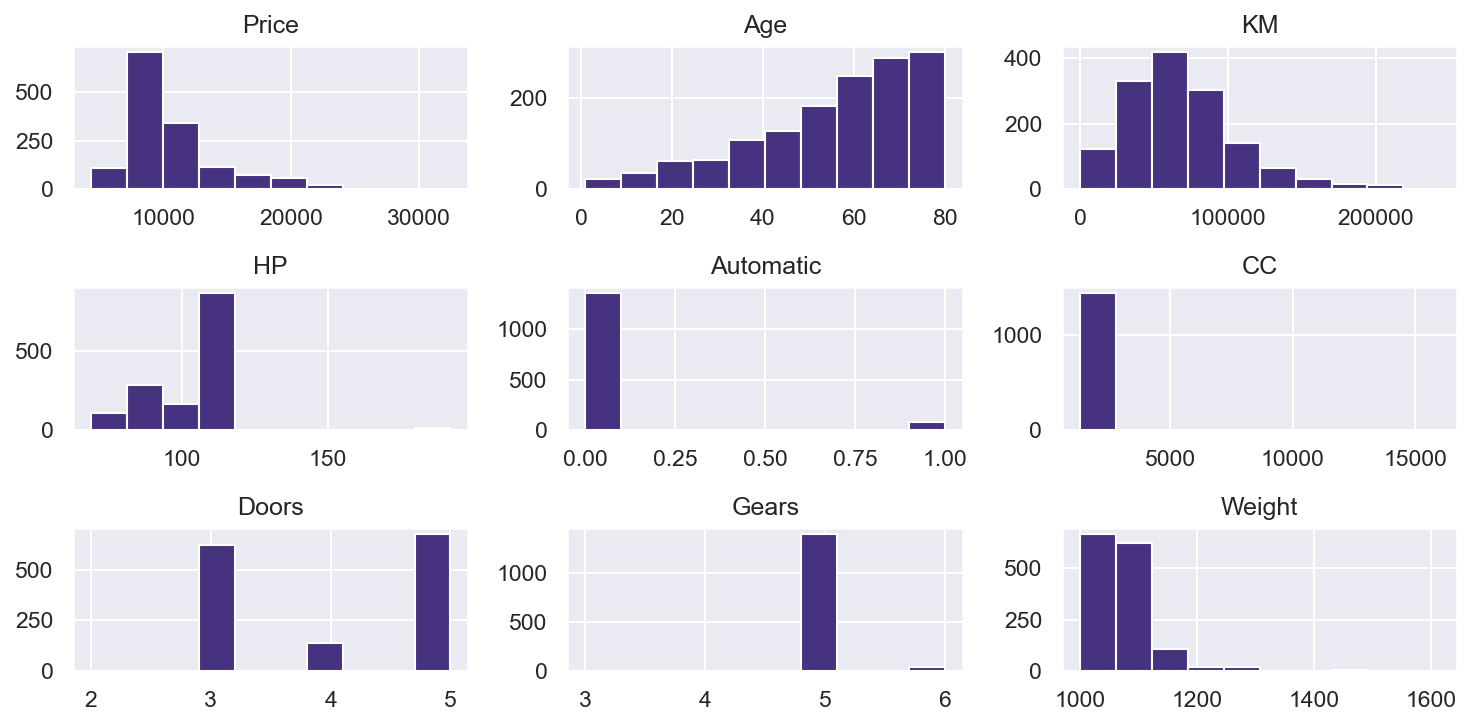

In [12]:
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['figure.dpi'] = 150
df.hist()
plt.tight_layout()
plt.show()

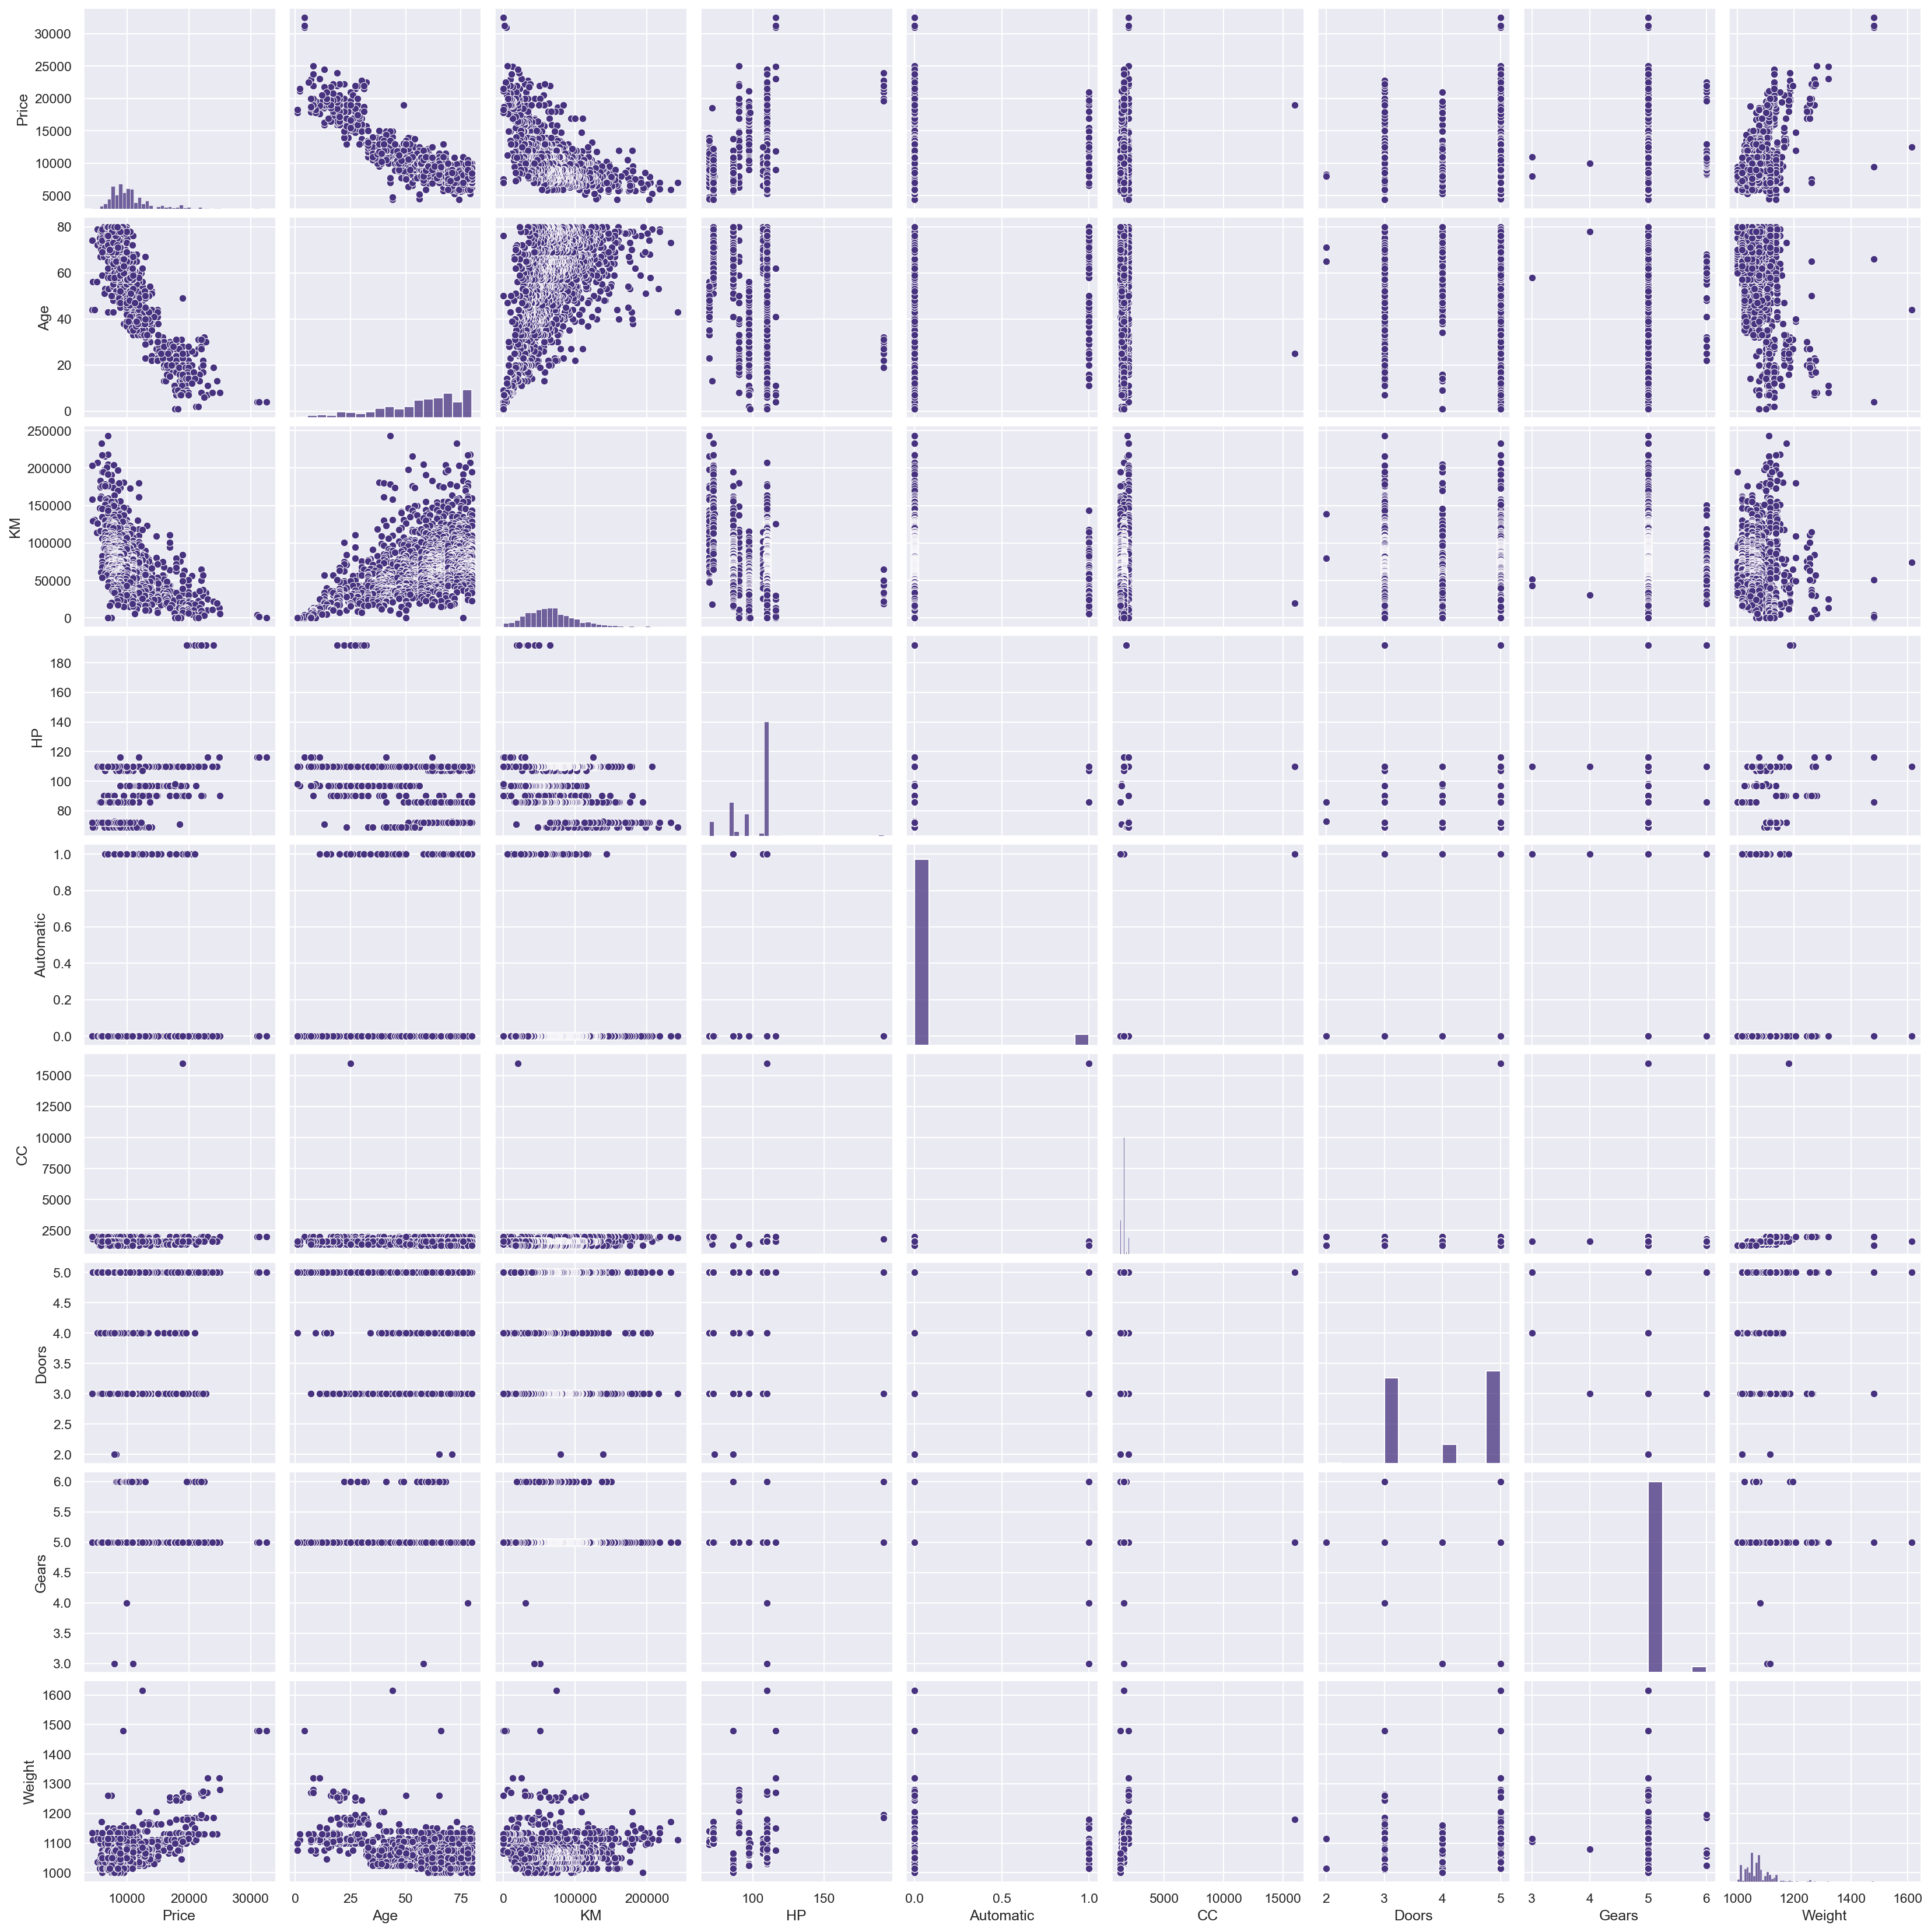

In [13]:
sns.pairplot(df)

<Axes: >

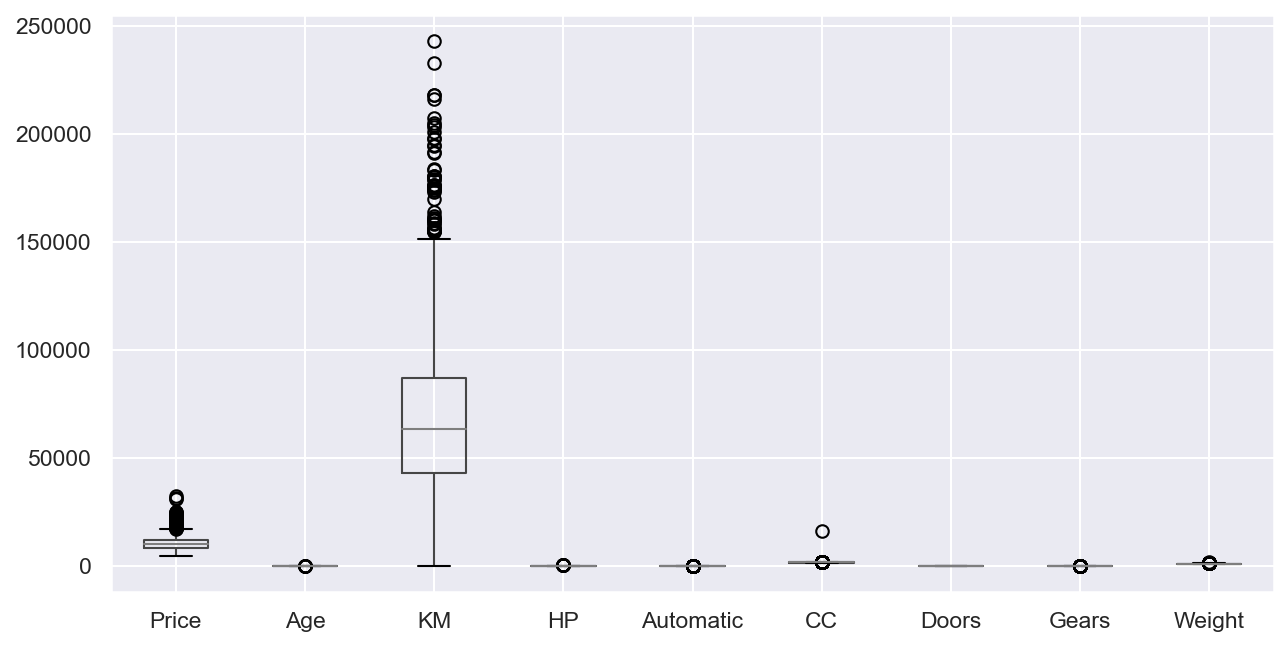

In [14]:
df.boxplot()

## Treating Outliers

In [15]:
def outliers(data,column):
    for col in column:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
       
        IQR = q3-q1
        
        low_ext = q1 - (1.5*IQR)
        upp_ext = q3 + (1.5*IQR)
        
        df[col] = np.where(df[col]>upp_ext,upp_ext,np.where(df[col]<low_ext,low_ext,df[col]))

In [16]:
outliers(df,df.iloc[:,0:3])

In [17]:
outliers(df,df.iloc[:,4:10])

In [18]:
data = pd.get_dummies(df,dtype=int)

<Axes: >

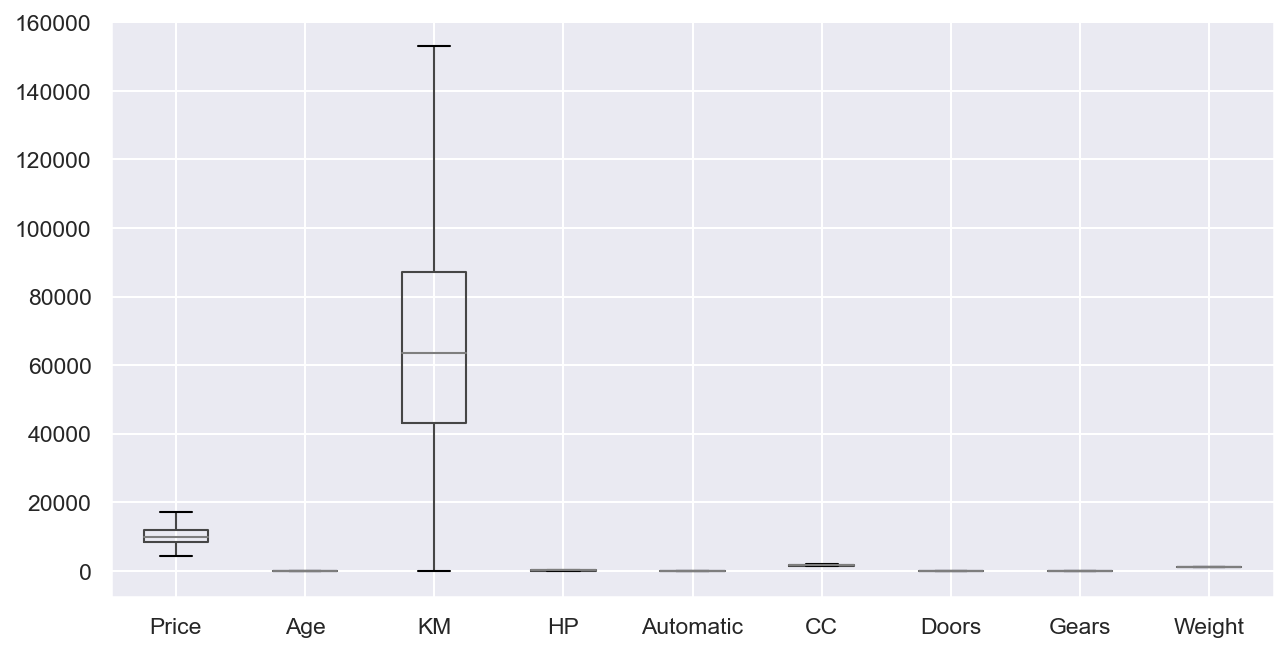

In [19]:
df.boxplot()

In [20]:
df.corr(numeric_only=True)

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.254427,NaN,0.129352,0.183010,NaN,0.507823
Age,-0.895340,1.000000,0.530670,-0.129602,NaN,-0.136644,-0.146704,NaN,-0.476150
KM,-0.607949,0.530670,1.000000,-0.329729,NaN,0.258680,-0.036618,NaN,0.000977
HP,0.254427,-0.129602,-0.329729,1.000000,NaN,0.098192,0.120139,NaN,0.024877
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC,0.129352,-0.136644,0.258680,0.098192,NaN,1.000000,0.138433,NaN,0.717782
Doors,0.183010,-0.146704,-0.036618,0.120139,NaN,0.138433,1.000000,NaN,0.381177
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.507823,-0.476150,0.000977,0.024877,NaN,0.717782,0.381177,NaN,1.000000


In [21]:
data

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,5.0,1025.0,0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1


# Defining Data 

In [22]:
x = data.iloc[:,1:13]

In [23]:
x

,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
1,23.0,72937.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
2,24.0,41711.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
3,26.0,48000.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
4,30.0,38500.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,86.0,0.0,1300.0,3.0,5.0,1025.0,0,0,1
1432,72.0,19000.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1433,71.0,17016.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1434,70.0,16916.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1


In [24]:
y = data['Price']
y

0       13500.0
1       13750.0
2       13950.0
3       14950.0
4       13750.0
         ...   
1431     7500.0
1432    10845.0
1433     8500.0
1434     7250.0
1435     6950.0
Name: Price, Length: 1435, dtype: float64

# Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
S_D = sc.fit_transform(x)

In [28]:
Final_SD = pd.DataFrame(S_D,columns=x.columns)
Final_SD

,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.781129,-0.595118,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
1,-1.781129,0.152463,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
2,-1.727143,-0.747078,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
3,-1.619171,-0.565908,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
4,-1.403226,-0.839578,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...
1430,0.702234,-1.356844,-1.148522,0.0,-1.531016,-1.084443,0.0,-1.154108,-0.109493,-0.346726,0.367811
1431,0.864192,-1.401323,-1.148522,0.0,-1.531016,-1.084443,0.0,-1.419293,-0.109493,-0.346726,0.367811
1432,0.810206,-1.458477,-1.148522,0.0,-1.531016,-1.084443,0.0,-1.419293,-0.109493,-0.346726,0.367811
1433,0.756220,-1.461357,-1.148522,0.0,-1.531016,-1.084443,0.0,-1.419293,-0.109493,-0.346726,0.367811


# Spliting The Data 

In [29]:
 from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

# Model Building

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
LR = LinearRegression()

In [34]:
LR.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = LR.predict(x_test)

In [36]:
mse = mean_squared_error(y_test,y_pred)

In [38]:
rmse = np.sqrt(mse)

In [39]:
r2 = r2_score(y_test,y_pred)

In [40]:
coefficients = pd.Series(LR.coef_,index=x_train.columns)

# Evaluation Metrics and Coefficients

In [41]:
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'Coefficients:')
print(coefficients)

MSE: 1275108.7184944423
RMSE: 1129.2071193959248
R2: 0.8504842513871487
Coefficients:
Age                -1.049554e+02
KM                 -1.485774e-02
HP                  2.999352e+01
Automatic          -1.421085e-13
CC                 -2.730928e+00
Doors              -1.284072e+02
Gears              -5.684342e-14
Weight              2.563973e+01
Fuel_Type_CNG      -6.517945e+02
Fuel_Type_Diesel    2.942836e+02
Fuel_Type_Petrol    3.575108e+02
dtype: float64


In [42]:
from sklearn.linear_model import Lasso,Ridge

In [43]:
Lasso_Model = Lasso(alpha=1.0)

In [44]:
Lasso_Model.fit(x_train,y_train)

Lasso()

In [45]:
Lasso_pred = Lasso_Model.predict(x_test)

In [46]:
Lasso_mse = mean_squared_error(y_test,Lasso_pred)
Lasso_mse

1277362.4751623624

In [47]:
Lasso_r2 = r2_score(y_test,Lasso_pred)
Lasso_r2

0.8502199820660251

In [48]:
ridge_model = Ridge(alpha=1.0)

In [49]:
ridge_model.fit(x_train,y_train)

Ridge()

In [50]:
ridge_pred = ridge_model.predict(x_test)

In [51]:
ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_mse

1276435.414300271

In [52]:
ridge_r2 = r2_score(y_test,ridge_pred)
ridge_r2

0.8503286866782631

Interview Questions:

1]. What is Normalization & Standardization and how is it helpful?

Normalization :- Normalization scales data values to a user-defined range, typically range between 0  and 1 or -1 and 1.
                Normalization is usefull when the data distribution is unknown or not normal. And it is sensitive to outliers and 
                it should be avioded if the dataset has extreme values.

Standardization :- Standardization is also known as z-score normalization, Standardization scales data to have mean is 0 and 
                   standard deviation is 1. It is beneficial when the dataset follows normal distribution and it is less likely affected by outliers.

Both techniques help to improve model performance, reduce the impact of outliers  and ensure that the data is on same scale.

2]. What techniques can be used to address multicollinearity in multiple linear regression?

Here are some techniques to address multicollinearity :

1. Correlation Matrix :- a). Identify highly correlated variables using corrrelation matrix.
                         b). Remove one of the feature which is highly related to reduce multicollinaerity.
2. Lasso Regression (L1 Regularization) :- Similar to ridge regression but uses L1 penalty, which can shrink coefficient to zero, 
                                           effectively performing variable selection.
3. Ridge Regression (L2 Regularization) :- Adds penalty terms to regression equation to shrink coefficient and helps in reducing variance caused by                                                multicollinearity.
4. Elastic Net Regression :- Combines both L1 and L2 regularization to address multicollinaerity and perform variables selection.
5. Variance Inflation Factor(VIF) :- Calculate VIF of each predictor. High VIF indicates multicollinaerity. and Remove or combine predictors with high                                      VIF values.